In [2]:
# Description: This program predicts employee attrition.


In [3]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#load the data
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload()


Saving HR_Employee_Attrition-1.csv to HR_Employee_Attrition-1.csv


In [5]:
#store the data into a data frame
df= pd.read_csv('HR_Employee_Attrition-1.csv')
#print first 10 rows
df.head(10)

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   
5               6        No   32  Travel_Frequently       1005   
6               7        No   59      Travel_Rarely       1324   
7               8        No   30      Travel_Rarely       1358   
8               9        No   38  Travel_Frequently        216   
9              10        No   36      Travel_Rarely       1299   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   
5  Research & Development                 2          2  Life Sciences   
6  Research & Development                 3          3        Medical   
7  Research & Development                24          1  Life Sciences   
8  Research & Development                23          3  Life Sciences   
9  Research & Development                27          3        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         1            80   
1              1  ...                         4            80   
2              1  ...                         2            80   
3              1  ...                         3            80   
4              1  ...                         4            80   
5              1  ...                         3            80   
6              1  ...                         1            80   
7              1  ...                         2            80   
8              1  ...                         2            80   
9              1  ...                         2            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   
5                 0                  8                      2               2   
6                 3                 12                      3               2   
7                 1                  1                      2               3   
8                 0                 10                      2               3   
9                 2                 17                      3               2   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   
5               7                  7                        3   
6               1                  0                        0   
7               1                  0                        0   
8               9                  7                        1   
9               7                  7                        7   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                 

In [6]:
df.shape


(2940, 35)

In [7]:
df.dtypes

EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.isna()

EmployeeNumber  Attrition    Age  BusinessTravel  DailyRate  Department  \
0              False      False  False           False      False       False   
1              False      False  False           False      False       False   
2              False      False  False           False      False       False   
3              False      False  False           False      False       False   
4              False      False  False           False      False       False   
...              ...        ...    ...             ...        ...         ...   
2935           False      False  False           False      False       False   
2936           False      False  False           False      False       False   
2937           False      False  False           False      False       False   
2938           False      False  False           False      False       False   
2939           False      False  False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                False      False           False          False  ...   
1                False      False           False          False  ...   
2                False      False           False          False  ...   
3                False      False           False          False  ...   
4                False      False           False          False  ...   
...                ...        ...             ...            ...  ...   
2935             False      False           False          False  ...   
2936             False      False           False          False  ...   
2937             False      False           False          False  ...   
2938             False      False           False          False  ...   
2939             False      False           False          False  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                        False          False             False   
1                        False          False             False   
2                        False          False             False   
3                        False          False             False   
4                        False          False             False   
...                        ...            ...               ...   
2935                     False          False             False   
2936                     False          False             False   
2937                     False          False             False   
2938                     False          False             False   
2939                     False          False             False   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                 False                  False            False   
1                 False                  False            False   
2                 False                  False            False   
3                 False                  False            False   
4                 False                  False            False   
...                 ...                    ...              ...   
2935              False                  False            False   
2936              False                  False            False   
2937              False                  False            False   
2938              False                  False            False   
2939              False                  False            False   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              False               False                    False   
1              False               False                    False   
2              False               False                    False   
3              False               False                    False   
4              False               False                    False   
...              ...                 ...                      ...   
2935           False               False                    Fal

In [9]:
df.isna().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
#view some stats
df.describe()


EmployeeNumber          Age    DailyRate  DistanceFromHome  \
count     2940.000000  2940.000000  2940.000000       2940.000000   
mean      1470.500000    36.923810   802.485714          9.192517   
std        848.849221     9.133819   403.440447          8.105485   
min          1.000000    18.000000   102.000000          1.000000   
25%        735.750000    30.000000   465.000000          2.000000   
50%       1470.500000    36.000000   802.000000          7.000000   
75%       2205.250000    43.000000  1157.000000         14.000000   
max       2940.000000    60.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  2940.000000         2940.0              2940.000000  2940.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.023991            0.0                 1.092896    20.325969   
min       1.000000            1.0                 1.000000    30.000000   
25%       2.000000            1.0                 2.000000    48.000000   
50%       3.000000            1.0                 3.000000    66.000000   
75%       4.000000            1.0                 4.000000    84.000000   
max       5.000000            1.0                 4.000000   100.000000   

       JobInvolvement     JobLevel  ...  RelationshipSatisfaction  \
count     2940.000000  2940.000000  ...               2940.000000   
mean         2.729932     2.063946  ...                  2.712245   
std          0.711440     1.106752  ...                  1.081025   
min          1.000000     1.000000  ...                  1.000000   
25%          2.000000     1.000000  ...                  2.000000   
50%          3.000000     2.000000  ...                  3.000000   
75%          3.000000     3.000000  ...                  4.000000   
max          4.000000     5.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         2940.0       2940.000000        2940.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.851932           7.779458   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521                 3.221882              3.567529  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 26 columns]

In [11]:
#no. of employees in the company and no of employees who have left
df['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


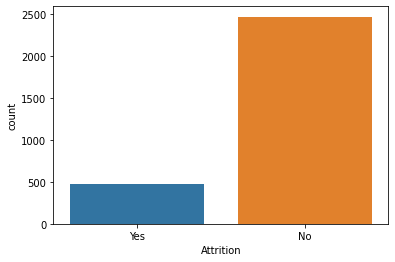

In [12]:
sns.countplot(df['Attrition'])

In [13]:
#acccuracy when it always predicts a 'NO'
(2466-474)/2466

0.8077858880778589

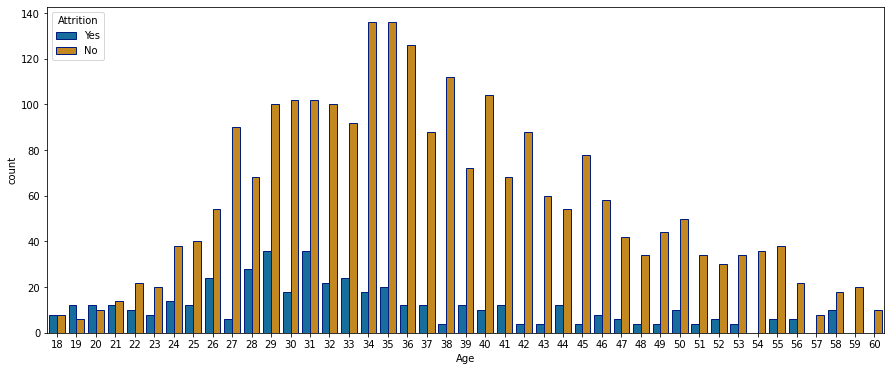

In [14]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));


In [15]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
________________________________________________________________

In [16]:
#Remove unneeded columns


df = df.drop('EmployeeNumber', axis = 1) 

df = df.drop('StandardHours', axis = 1) 

df = df.drop('EmployeeCount', axis = 1) 

df = df.drop('Over18', axis = 1) 

In [17]:
#Get the correlation of the columns
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

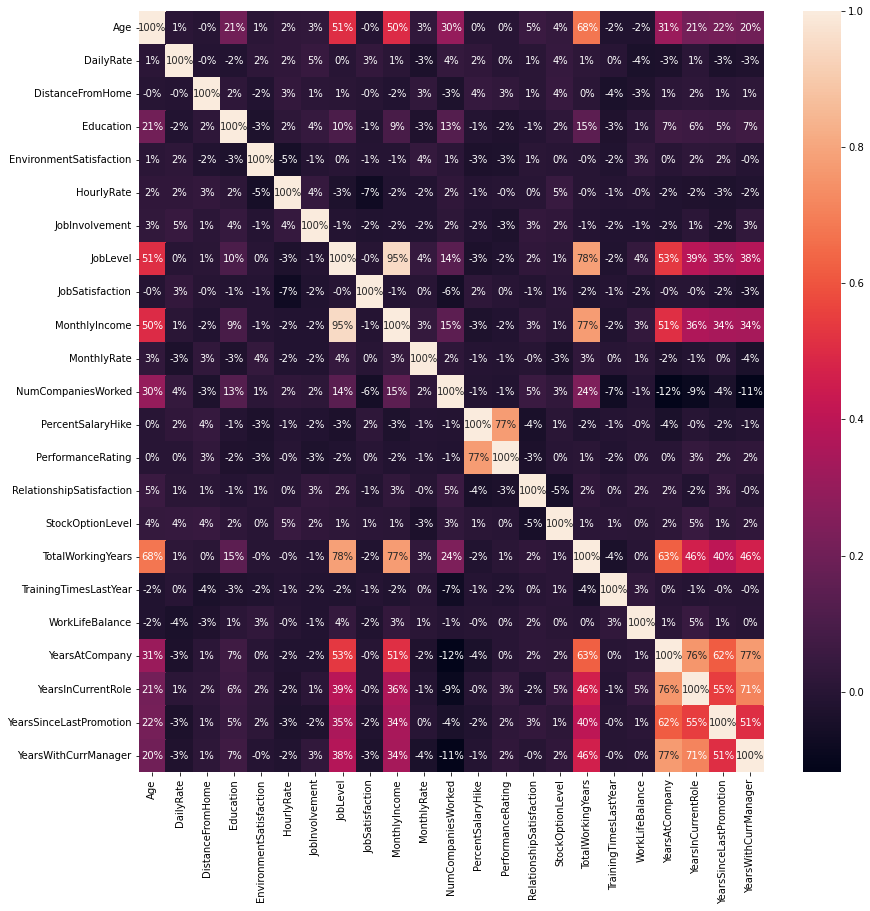

In [18]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [19]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """


In [20]:
df


Attrition  Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0             1   23               2        624           2                 0   
1             0   31               1        113           1                 7   
2             1   19               2        805           1                 1   
3             0   15               1        820           1                 2   
4             0    9               2        312           1                 1   
...         ...  ...             ...        ...         ...               ...   
2935          0   18               1        494           1                22   
2936          0   21               2        327           1                 5   
2937          0    9               2         39           1                 3   
2938          0   31               1        579           2                 1   
2939          0   16               2        336           1                 7   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             1               1                        1       0  ...   
1             0               1                        2       1  ...   
2             1               4                        3       1  ...   
3             3               1                        3       0  ...   
4             0               3                        0       1  ...   
...         ...             ...                      ...     ...  ...   
2935          1               3                        2       1  ...   
2936          0               3                        3       1  ...   
2937          2               1                        1       1  ...   
2938          2               3                        3       1  ...   
2939          2               3                        1       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     0                         0                 0   
1                     1                         3                 1   
2                     0                         1                 0   
3                     0                         2                 0   
4                     0                         3                 1   
...                 ...                       ...               ...   
2935                  0                         2                 1   
2936                  0                         0                 1   
2937                  1                         1                 1   
2938                  0                         3                 0   
2939                  0                         0                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                0   
1                    10                      3                2   
2                     7                      3                2   
3                     8                      3                2   
4                     6                      3                2   
...                 ...                    ...              ...   
2935                 17                      3                2   
2936                  9                      5                2   
2937                  6                      0                2   
2938                 17                      3                1   
2939                  6                      3                3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
2935           

In [21]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

In [22]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [23]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [24]:
#Get the accuracy on the training data
forest.score(X_train, Y_train)

0.9945578231292517

In [25]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line


[[608   2]
 [ 32  93]]
Model Testing Accuracy = "0.9537414965986395!"



Done By

Ananya Barath

Aishwarya

Lavanya N